In [1]:
#Direct Stiffness Method (Julia)
#Michael Loreantz // 2022
#Truss

E = 2*10^8   #E  : Section Elastic Modulii (kPa)
Asoal=9*10^-4
Ael = [1 Asoal
       2 Asoal
       3 Asoal
       4 Asoal
       5 Asoal
       6 Asoal
       7 Asoal
       8 Asoal
       9 Asoal]   #A  : Cross Sectional Area, m^2
un = 2  #un : DOFs per node

#Node positioning [Node Number, X coordinate, Y coordinate]
Node = [1 0 0
        2 6 0
        3 6 4
        4 6 8
        5 4.5 6
        6 3 4];

#Element Connectivity (Element number, i Node, j Node)
EL = [1 1 2
      2 2 3
      3 3 4
      4 4 5
      5 5 3
      6 3 6
      7 6 5
      8 2 6
      9 6 1];

#Nodal Restraints (Node Number, u, v)
##Logical inputs: 1=Restrained, 0=No restraints
Rest = [1 1 1
        2 1 1];

#Nodal loads (Nodal fx fy)
fp = [4 100 0
      5 100 0
      6 100 0];

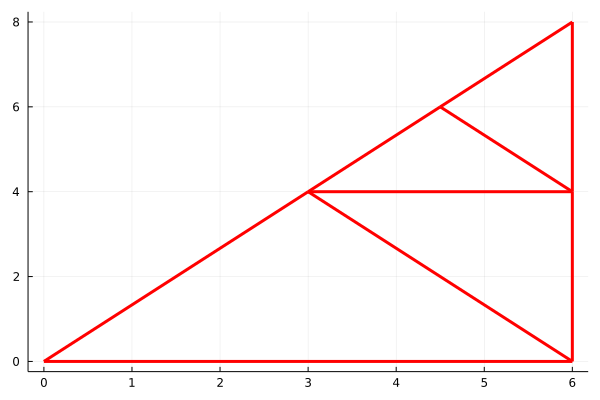

In [2]:
import Pkg
#Pkg.add("Plots")                #Note: Erase the "#" if error shows up
using Plots
inodes=Node[:,2]
jnodes=Node[:,3]

for g in 1:size(EL,1)
xcoord=[inodes[EL[g,2]],inodes[EL[g,3]]]
ycoord=[jnodes[EL[g,2]],jnodes[EL[g,3]]]
p=plot!(xcoord,ycoord,color=:red, legend=false,lw=3)

    if g==size(EL,1)
    display(p)
    end
end

In [3]:
#Truss Stiffness
function TrussStiffness(E,A,L,c,s)
E*A/L*[c^2 c*s -c^2 -c*s
       c*s s^2 -c*s -s^2
       -c^2 -c*s c^2 c*s
       -c*s -s^2 c*s s^2];
    end

TrussStiffness (generic function with 1 method)

In [13]:
#Element Stiffness Calculations
#KS : Element stiffness matrix (Global)
KS = zeros(un*size(Node,1),un*size(Node,1));

for i=1:size(EL,1)
    ni=EL[i,2];     #i node
    nj=EL[i,3];     #j node
    xi=Node[ni,2];  #i node coordinate (x)
    yi=Node[ni,3];  #i node coordinate (y)
    xj=Node[nj,2];  #j node coordinate (x)
    yj=Node[nj,3];  #j node coordinate (y)

    #DOF Indexing
    iND=[un*ni .- Array((un-1):-1:0);un*nj .- Array((un-1):-1:0)];
    L=((xj-xi)^2+(yj-yi)^2)^(0.5); #Element's length by pythagorean
    c=(xj-xi)/L; #Cosine of element
    s=(yj-yi)/L; #Sine of element
    
    Elementnumber=i
    A=Ael[i,2]
    ktruss = TrussStiffness(E,A,L,c,s)

    display(Elementnumber)         #Note: Erase # to show each element's stiffness
    display(ktruss)                #Note: Erase # to show each element's stiffness
    #KS : Global structure's stiffness
    KS[iND,iND] = KS[iND,iND] + ktruss;
    display(KS)
end

1

4×4 Matrix{Float64}:
  30000.0   0.0  -30000.0  -0.0
      0.0   0.0      -0.0  -0.0
 -30000.0  -0.0   30000.0   0.0
     -0.0  -0.0       0.0   0.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -30000.0  0.0   30000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

2

4×4 Matrix{Float64}:
  0.0       0.0  -0.0      -0.0
  0.0   45000.0  -0.0  -45000.0
 -0.0      -0.0   0.0       0.0
 -0.0  -45000.0   0.0   45000.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 -30000.0  0.0   30000.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0   45000.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  -45000.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0

3

4×4 Matrix{Float64}:
  0.0       0.0  -0.0      -0.0
  0.0   45000.0  -0.0  -45000.0
 -0.0      -0.0   0.0       0.0
 -0.0  -45000.0   0.0   45000.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0  0.0  …  0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 -30000.0  0.0   30000.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0   45000.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0  -45000.0  0.0  …  0.0  -45000.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0   45000.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0  …  0.0       0.0  0.0  0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0

4

4×4 Matrix{Float64}:
  25920.0   34560.0  -25920.0  -34560.0
  34560.0   46080.0  -34560.0  -46080.0
 -25920.0  -34560.0   25920.0   34560.0
 -34560.0  -46080.0   34560.0   46080.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0  0.0  …       0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0          0.0       0.0  0.0  0.0
 -30000.0  0.0   30000.0       0.0  0.0          0.0       0.0  0.0  0.0
      0.0  0.0       0.0   45000.0  0.0          0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0          0.0       0.0  0.0  0.0
      0.0  0.0       0.0  -45000.0  0.0  …       0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     -25920.0  -34560.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0     -34560.0  -46080.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0      25920.0   34560.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0      34560.0   46080.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0  …       0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0  0.0          0.0       0.0  0.0  0.0

5

4×4 Matrix{Float64}:
  25920.0  -34560.0  -25920.0   34560.0
 -34560.0   46080.0   34560.0  -46080.0
 -25920.0   34560.0   25920.0  -34560.0
  34560.0  -46080.0  -34560.0   46080.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0       0.0  …       0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0       0.0          0.0       0.0  0.0  0.0
 -30000.0  0.0   30000.0       0.0       0.0          0.0       0.0  0.0  0.0
      0.0  0.0       0.0   45000.0       0.0          0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0   25920.0     -25920.0   34560.0  0.0  0.0
      0.0  0.0       0.0  -45000.0  -34560.0  …   34560.0  -46080.0  0.0  0.0
      0.0  0.0       0.0       0.0       0.0     -25920.0  -34560.0  0.0  0.0
      0.0  0.0       0.0       0.0       0.0     -34560.0  -46080.0  0.0  0.0
      0.0  0.0       0.0       0.0  -25920.0      51840.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0   34560.0          0.0   92160.0  0.0  0.0
      0.0  0.0       0.0       0.0       0.0  …       0.0       0.0  0.0  0.0
      0.0  0.0       0.0       0.0       0.0          0.0       0.0  0.0  0.0

6

4×4 Matrix{Float64}:
  60000.0  -0.0  -60000.0   0.0
     -0.0   0.0       0.0  -0.0
 -60000.0   0.0   60000.0  -0.0
      0.0  -0.0      -0.0   0.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0  …       0.0       0.0       0.0  0.0
      0.0  0.0       0.0       0.0          0.0       0.0       0.0  0.0
 -30000.0  0.0   30000.0       0.0          0.0       0.0       0.0  0.0
      0.0  0.0       0.0   45000.0          0.0       0.0       0.0  0.0
      0.0  0.0       0.0       0.0     -25920.0   34560.0  -60000.0  0.0
      0.0  0.0       0.0  -45000.0  …   34560.0  -46080.0       0.0  0.0
      0.0  0.0       0.0       0.0     -25920.0  -34560.0       0.0  0.0
      0.0  0.0       0.0       0.0     -34560.0  -46080.0       0.0  0.0
      0.0  0.0       0.0       0.0      51840.0       0.0       0.0  0.0
      0.0  0.0       0.0       0.0          0.0   92160.0       0.0  0.0
      0.0  0.0       0.0       0.0  …       0.0       0.0   60000.0  0.0
      0.0  0.0       0.0       0.0          0.0       0.0       0.0  0.0

7

4×4 Matrix{Float64}:
  25920.0   34560.0  -25920.0  -34560.0
  34560.0   46080.0  -34560.0  -46080.0
 -25920.0  -34560.0   25920.0   34560.0
 -34560.0  -46080.0   34560.0   46080.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0       0.0  …       0.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0          0.0       0.0       0.0
 -30000.0  0.0   30000.0       0.0       0.0          0.0       0.0       0.0
      0.0  0.0       0.0   45000.0       0.0          0.0       0.0       0.0
      0.0  0.0       0.0       0.0   85920.0      34560.0  -60000.0       0.0
      0.0  0.0       0.0  -45000.0  -34560.0  …  -46080.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0     -34560.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0     -46080.0       0.0       0.0
      0.0  0.0       0.0       0.0  -25920.0      34560.0  -25920.0  -34560.0
      0.0  0.0       0.0       0.0   34560.0     138240.0  -34560.0  -46080.0
      0.0  0.0       0.0       0.0  -60000.0  …  -34560.0   85920.0   34560.0
      0.0  0.0       0.0       0.0       0.0     -46080.0   34560.0   46080.0

8

4×4 Matrix{Float64}:
  12960.0  -17280.0  -12960.0   17280.0
 -17280.0   23040.0   17280.0  -23040.0
 -12960.0   17280.0   12960.0  -17280.0
  17280.0  -23040.0  -17280.0   23040.0

12×12 Matrix{Float64}:
  30000.0  0.0  -30000.0       0.0       0.0  …       0.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0          0.0       0.0       0.0
 -30000.0  0.0   42960.0  -17280.0       0.0          0.0  -12960.0   17280.0
      0.0  0.0  -17280.0   68040.0       0.0          0.0   17280.0  -23040.0
      0.0  0.0       0.0       0.0   85920.0      34560.0  -60000.0       0.0
      0.0  0.0       0.0  -45000.0  -34560.0  …  -46080.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0     -34560.0       0.0       0.0
      0.0  0.0       0.0       0.0       0.0     -46080.0       0.0       0.0
      0.0  0.0       0.0       0.0  -25920.0      34560.0  -25920.0  -34560.0
      0.0  0.0       0.0       0.0   34560.0     138240.0  -34560.0  -46080.0
      0.0  0.0  -12960.0   17280.0  -60000.0  …  -34560.0   98880.0   17280.0
      0.0  0.0   17280.0  -23040.0       0.0     -46080.0   17280.0   69120.0

9

4×4 Matrix{Float64}:
  12960.0   17280.0  -12960.0  -17280.0
  17280.0   23040.0  -17280.0  -23040.0
 -12960.0  -17280.0   12960.0   17280.0
 -17280.0  -23040.0   17280.0   23040.0

12×12 Matrix{Float64}:
  42960.0   17280.0  -30000.0       0.0  …       0.0  -12960.0  -17280.0
  17280.0   23040.0       0.0       0.0          0.0  -17280.0  -23040.0
 -30000.0       0.0   42960.0  -17280.0          0.0  -12960.0   17280.0
      0.0       0.0  -17280.0   68040.0          0.0   17280.0  -23040.0
      0.0       0.0       0.0       0.0      34560.0  -60000.0       0.0
      0.0       0.0       0.0  -45000.0  …  -46080.0       0.0       0.0
      0.0       0.0       0.0       0.0     -34560.0       0.0       0.0
      0.0       0.0       0.0       0.0     -46080.0       0.0       0.0
      0.0       0.0       0.0       0.0      34560.0  -25920.0  -34560.0
      0.0       0.0       0.0       0.0     138240.0  -34560.0  -46080.0
 -12960.0  -17280.0  -12960.0   17280.0  …  -34560.0  111840.0   34560.0
 -17280.0  -23040.0   17280.0  -23040.0     -46080.0   34560.0   92160.0

In [5]:
#Load Calculations
FN = zeros(un*size(Node,1),1);
forces=zeros(un*size(Node,1),1); # Beban nodal global 
 for i=1:size(fp,1)
     Ifx=Int64(2*fp[i,1]-1); #d.k gaya arah gaya fx
     Ify=Int64(2*fp[i,1]); #d.k gaya arah gaya fy
     

     forces[Ifx]=fp[i,2]; #fx
     forces[Ify]=fp[i,3]; #fy
 end
 
FN=forces; #penjumlahan nodal

In [6]:
#Boundary Condition
#Pkg.add("InvertedIndices")                        #Note: Erase the "#" if error shows up
using InvertedIndices
nDS = transpose((un*Rest[:,1]*transpose(ones(un,1)))-(ones(size(Rest,1))*transpose(Array(un-1:-1:0)))); #nDS : dk yang terdapat di boundary condition
iDS = nDS[transpose(isone.(Rest[:,2:end]))]; #iDS : d.k terkekang #Logical indexing
iDS = Int64.(iDS) #Convert Float to Int64
iDE = Array(1:un*size(Node,1))[Not(iDS)];#iDE : d.k tidak terkekang

In [16]:
#Load processing
KSr  = KS[iDE,iDE]; #KS : kekakuan struktur yg tereduksi 
Fn = FN[iDE];  # Fn : Gaya luar yg tereduksi
DS=KSr\Fn;# Un : displasemen tidak sama dengan nol

display(KSr)
display(Fn)

8×8 Matrix{Float64}:
  85920.0  -34560.0       0.0       0.0  …   34560.0  -60000.0       0.0
 -34560.0  136080.0       0.0  -45000.0     -46080.0       0.0       0.0
      0.0       0.0   25920.0   34560.0     -34560.0       0.0       0.0
      0.0  -45000.0   34560.0   91080.0     -46080.0       0.0       0.0
 -25920.0   34560.0  -25920.0  -34560.0      34560.0  -25920.0  -34560.0
  34560.0  -46080.0  -34560.0  -46080.0  …  138240.0  -34560.0  -46080.0
 -60000.0       0.0       0.0       0.0     -34560.0  111840.0   34560.0
      0.0       0.0       0.0       0.0     -46080.0   34560.0   92160.0

8-element Vector{Float64}:
   0.0
   0.0
 100.0
   0.0
 100.0
   0.0
 100.0
   0.0

In [8]:
#Displacements
#Pkg.add("DataFrames")                #Note: Erase the "#" if error shows up
#Pkg.add("PrettyTables")              #Note: Erase the "#" if error shows up
using DataFrames, PrettyTables
DSA = zeros(un*size(Node,1),1);
DSA[iDE,1]=DS;
Displacement = transpose(reshape(DSA,un,:))
DisplacementDataFrame=DataFrame([1:size(Node,1), Displacement[:,1], Displacement[:,2]],["Node","Horizontal Displacement (m)", "Vertical Displacement (m)"])
pretty_table(DisplacementDataFrame,nosubheader=true)

┌──────┬─────────────────────────────┬───────────────────────────┐
│ Node │ Horizontal Displacement (m) │ Vertical Displacement (m) │
├──────┼─────────────────────────────┼───────────────────────────┤
│    1 │                         0.0 │                       0.0 │
│    2 │                         0.0 │                       0.0 │
│    3 │                   0.0124074 │               -0.00444444 │
│    4 │                   0.0368827 │               -0.00740741 │
│    5 │                   0.0217052 │                0.00108218 │
│    6 │                   0.0115741 │                0.00434028 │
└──────┴─────────────────────────────┴───────────────────────────┘


In [9]:
#Reactions
RP = KS[iDS,iDE]*DS-FN[iDS];
Reaction = zeros(un*size(Node,1),1);
Reaction[iDS] = Reaction[iDS] + RP
Reactions = transpose(reshape(Reaction,un,:))
ReactionsDataFrame=DataFrame([1:size(Node,1), Reactions[:,1], Reactions[:,2]],["Node","FX (kN)", "FY (kN)"])
pretty_table(ReactionsDataFrame,nosubheader=true)

┌──────┬─────────┬─────────┐
│ Node │ FX (kN) │ FY (kN) │
├──────┼─────────┼─────────┤
│    1 │  -225.0 │  -300.0 │
│    2 │   -75.0 │   300.0 │
│    3 │     0.0 │     0.0 │
│    4 │     0.0 │     0.0 │
│    5 │     0.0 │     0.0 │
│    6 │     0.0 │     0.0 │
└──────┴─────────┴─────────┘


In [10]:
#Internal Forces (Member's end forces)
#Pkg.add("LinearAlgebra")             #Note: Erase the "#" if error shows up
using LinearAlgebra
Axial = zeros(size(EL,1),1);
for i=1:size(EL,1)
    ni=EL[i,2];#aw : nodal awal elemen
    nj=EL[i,3];#ak : nodal akhir elemen
    xi=Node[ni,2];#xi : koordinat nodal awal
    yi=Node[ni,3];#yi : koordinat nodal awal
    xj=Node[nj,2];#xj : koordinat nodal akhir
    yj=Node[nj,3];#yj : koordinat nodal awal
    
    #Derajat kebebasan pada nodal - nodal awal dan akhir
    iND=[un*ni .- Array((un-1):-1:0);un*nj .- Array((un-1):-1:0)];
    
    L=((xj-xi)^2+(yj-yi)^2)^(0.5); #panjang elemen
    c=(xj-xi)/L; #cosinus
    s=(yj-yi)/L; #sinus

    A=Ael[i,2]
    Axial[i] = (E*A/L) * [-c -s c s]⋅DSA[iND]+ Axial[i];
end
AxialLoadDataFrame=DataFrame([1:size(EL,1), Axial[:,1]],["Member","Axial Load (kN)"])
pretty_table(AxialLoadDataFrame,nosubheader=true)

┌────────┬─────────────────┐
│ Member │ Axial Load (kN) │
├────────┼─────────────────┤
│      1 │             0.0 │
│      2 │          -200.0 │
│      3 │        -133.333 │
│      4 │         166.667 │
│      5 │        -83.3333 │
│      6 │            50.0 │
│      7 │           250.0 │
│      8 │          -125.0 │
│      9 │           375.0 │
└────────┴─────────────────┘
